In [3]:
import skimage
from skimage import io
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)
logo = io.imread('https://scikit-image.org/_static/img/logo.png')
io.imsave('local_logo.png', logo)

from skimage import img_as_float
camera_float = img_as_float(camera)
print(camera.max(), camera_float.max())

from skimage import filters
camera_sobel = filters.sobel(camera)
print(camera_sobel.max())

import scipy
face = scipy.misc.face()
print(face.shape)

255 1.0
0.5915023652179584
(768, 1024, 3)


[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


E:\Anaconda\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
E:\Anaconda\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


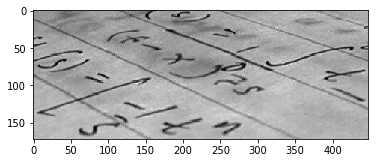

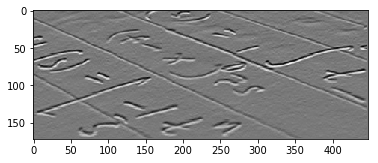

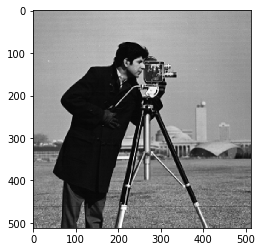

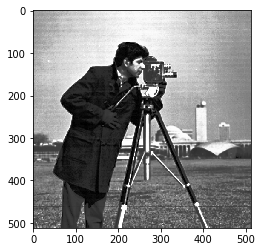

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
text = data.text()
hsobel_text = filters.sobel_h(text)
plt.figure()
plt.imshow(text, cmap='gray')
plt.figure()
plt.imshow(hsobel_text, cmap='gray')

from skimage import exposure
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)
plt.figure()
plt.imshow(camera, cmap='gray')
plt.figure()
plt.imshow(camera_equalized, cmap='gray')

from skimage import morphology
a = np.zeros((7, 7), dtype=np.uint8)
a[1:6, 2:5] = 1
print(a)
b = morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)
print(b)

a = np.zeros((5, 5), dtype=np.uint8)
a[2, 2] = 1
print(a)
b = morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)
print(b)

from skimage.morphology import disk
from skimage import filters
coins = data.coins()
coins_zoom = coins[10:80, 300:370]
median_coins = filters.median(coins_zoom, disk(1))
from skimage import restoration
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
gaussian_coins = filters.gaussian(coins_zoom, sigma=2)

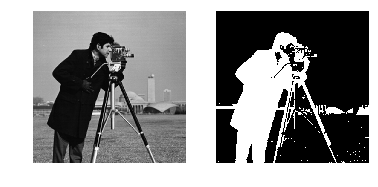

In [13]:
from skimage import data
from skimage import filters
camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val
plt.figure()
plt.subplot(121), plt.axis('off')
plt.imshow(camera, cmap='gray')
plt.subplot(122), plt.axis('off')
plt.imshow(mask, cmap='gray')